In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('./deeplearning.mplstyle')

In [13]:
prop = pd.read_csv('uae-real-estate.csv')
prop.head() #5

,Name,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price
0,Elegant Unit| Golf Views| High-Floor| Prime Area,Apartment,24.463860,54.595603,747,0,1,Abu Dhabi,Yas Island,1300000
1,Sea & City View | Full Facilities | Prime Area,Apartment,24.487354,54.395122,"1,524",2,3,Abu Dhabi,Al Reem Island,1700000
2,Hot Offer|Furnished 2BR+M|Full Sea View|High F...,Apartment,24.492602,54.392677,"1,615",2,3,Abu Dhabi,Al Reem Island,1650000
3,Amazing Deal| Huge Layout | Big Terrace| Inves...,Apartment,24.484639,54.404103,"1,220",1,2,Abu Dhabi,Al Reem Island,800000
4,Luxurious Lifestyl|Exclusive Amenities|Invest Now,Apartment,24.538734,54.410601,"5,315",4,5,Abu Dhabi,Saadiyat Island,19000000


In [20]:
df = pd.DataFrame(prop,columns=['Area','Price'])
print(df)

         Area     Price
0         747   1300000
1       1,524   1700000
2       1,615   1650000
3       1,220    800000
4       5,315  19000000
...       ...       ...
29900   3,702   7250000
29901   2,110   3187000
29902   1,964   2250000
29903  18,000   6500000
29904   2,477   2400000

[29905 rows x 2 columns]


In [18]:
x_train = prop["Area"].to_numpy()
y_train = prop["Price"].to_numpy()
print(x_train)
print(y_train)

['747' '1,524' '1,615' ... '1,964' '18,000' '2,477']
[1300000 1700000 1650000 ... 2250000 6500000 2400000]


In [21]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 29905


Text(0.5, 1.0, 'Housing Prices')

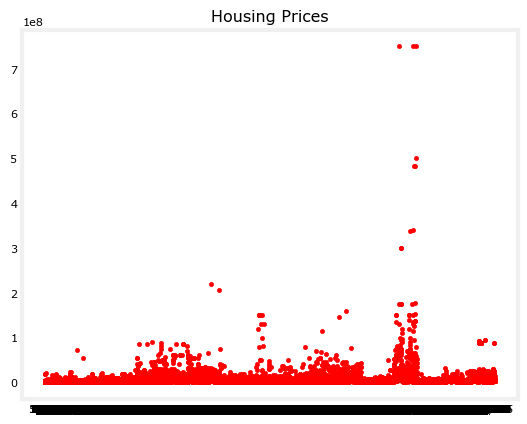

In [24]:
plt.scatter(x_train, y_train, marker='.', c='r')
plt.title("Housing Prices")

In [ ]:
def compute_model_output(x, w, b):

    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb